# Kак роботы планируют траекторию движения

In [1]:
# Не изменяйте эту ячейку и запустите её перед началом работы!
!pip install pygame
import math

![1](./Image/1.png)

В этом ноутбуке мы рассмотрим проблему нахождения кратчайшего пути на карте. Эта задача используется в робототехнике, компьютерных играх и сервисах такси, доставки и т.п. В данном ноутбуке карта будет представлять из себя сетку, в которой одни клетки проходимы, а другие представляют собой препятствия. Существуют разные спрособы определять соседей клетки, например, соседями могут являться только смежные клетки с данной или можно еще разрешать ходить по диагонали при некоторых ограничениях. В этом задании будем предполагать, что мы можем ходить только по смежным клеткам: вверх, вниз, влево и вправо.

Базовым алгоритмом поиска кратчайшего пути является алгоритм Дийкстры. Суть алгоритма проста — обходить вершины в порядке возрастания расстояния от начальной вершины. Для этого мы храним для каждой вершины метку `g` — минимальное известное расстояние от начальной вершины до этой (изначально для стартовой вершины оно равно `0`, а для всех остальных `infty`).
 На каждом шаге мы рассматриваем вершину с минимальным g среди нерассмотренных (Понятно, что на первой итерации выбрана будет стартовая вершина). Нетрудно доказать, что при неотрицательных весах при рассмотрении `g` этой вершины равно истинному значению минимального расстояния.  Далее, на текущей итерации, из рассматриваемой вершины производятся релаксации: мы пытаемся улучшить значение `g` для всех соседей этой вершины, то есть
 
`neighbour.g = min(neighbour.g, self.g + dist(self, neighbour))`

![2](./Image/dijkstra.gif)

В нашем случае мы решаем задачу поиска кратчайшего пути до одной конкретной вершины, значит во время рассмотрения этой самой вершины алгоритм можно и нужно остановить. Помимо этого в нашей ситуации много упрощений, поскольку граф клетчатый, соседи - это несколько смежных клеток, а веса рёбер равны единице.

Однако алгоритм Дийкстры имеет большой минус: если мы ищем кратчайший путь от начальной вершины до конкретной, то мы рассмотрим ВСЕ вершины, расстояние до которых меньше чем до целевой, даже если они в противоположной от неё стороне. Например, если мы хотим долететь из Новосибирска до Владивостока, то зачем лететь с пересадкой в Москве, ведь она находится в противоположной стороне. Чтобы это исправить, рассмотрим `h` — эвристическую функцию вершины. Это оценка расстояния от неё до конечной. И тогда логично брать вершину не с минимальным `g`, а минимальным значением `f = g + h`. Такой алогоритм называется A* (A-star, А-звёздочка). Вот наглядный пример его работы:

In [2]:
# Может стоит добавить две гифки - сравнение дийкстры и a*?

![3](./Image/astar.gif)

Как видите, алгоритм не рассматривает многие вершины, которые алгоритм Дийсткры бы рассмотрел. Таким образом, хорошая метрика для A* как раз поможет избежать лишних действий

Введём класс `Node`, описывающий вершину. У него есть следующие поля:
- `i`, `j` - координаты вершины;
- `g`;
- `f = g + h`;
- parent - вершина, из которой мы пришли в данную. По этому полю мы сможем восстановить путь.

In [3]:
class Node:
    def __init__(self, i, j, g = math.inf, h = 0, parent = None):
        self.i = i
        self.j = j
        self.g = g
        self.f = self.g + h       
        self.parent = parent
    
    def __eq__(self, other):
        return (self.i == other.i) and (self.j == other.j)
    
    def __gt__(self, other):
        return self.f > other.f
    
    def __hash__(self):
        return 31 + 7 * (hash(self.i) + 7 * hash(self.j))
    
    def __str__(self):
        return 'i: {0}, j: {1}, g: {2}, F: {3}, parent: {4}'.format(self.i, self.j, self.g, self.f, self.parent)

Теперь определим класс `Grid`, описывающий граф, в котором робот будет искать путь. У него есть следующие поля:
- `height`, `width` - высота и ширина, то есть размер поля по оси X и Y соответсвенно;
- `cells` - двумерная матрица, описывающая клетки поля. Если значение `cells[i][j]` равно `1`, то это значит, что через клетку в `i`-м ряду и `j`-й столбце можно пройти. Если же оно равно `0`, то клетка непроходима.

In [4]:
# TODO MAKE TASK
class Grid:

    def __init__(self, height=0, width=0, cells=[]):
        self.height = height
        self.width = width
        self.cells = cells

    # Проверка, не выходит ли клетка (i, j) за границы поля   
    def in_bounds(self, i, j):
        return (0 <= j < self.width) and (0 <= i < self.height)
    
    # Проверка, можно ли пройти через клетку (i, j) 
    def traversable(self, i, j):
        return not self.cells[i][j]
    
    # Список соседей клетки (i, j) в виде list-а из tuple-ов вида (n_i, n_j)
    def get_neighbors(self, i, j):
        neighbors = []
        
        # TODO! Реализуйте эту функцию!
        # Робот может ходить только прямо, то есть по диагонали ходить нельзя.
        # Не забывайте про границы и непроходимые клетки!
        
        neighbors = []
        delta = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        for d in delta:
            if self.in_bounds(i + d[0], j + d[1]) and self.traversable(i + d[0], j + d[1]):
                neighbors.append((i + d[0], j + d[1]))
      
        return neighbors

### Реализация Open и Closed

В нашей реализации мы будем использовать два класса — `Open` и `Closed`. `Open` содержит нерассмотренные вершины, а `Closed` — уже рассмотренные. 

От `Open` требуется выполнять следующие операции: добавлять вершину (или обновлять значение её `g`, если она уже была добавлена) и быстро доставать вершину с минимальным `f`.

In [5]:
from heapdict import heapdict

class Open:
    def __init__(self):
        self.elements = dict()
        self.heap = heapdict()
    
    def __len__(self):
        return len(self.elements)
    
    def __iter__(self):
        return iter(self.elements.values())

    # Проверка, ялвялется ли Open пустым
    def is_empty(self):
        return len(self.elements) == 0

    # Добавление вершины. Если вершина с таким координатами уже лежит,
    # то мы проверяем, не можем ли мы улучшить её значение g
    def add_node(self, item: Node):
        key = item.i, item.j
        if key in self.elements:
            if item < self.elements[key]:
                self.elements[key] = item
                self.heap[key] = item.f
        else:
            self.elements[key] = item
            self.heap[key] = item.f
            
    # Извлекаем вершину с наименьшим значением f
    def get_best_node(self):
        key, _ = self.heap.popitem()
        return self.elements.pop(key)

От `Closed` требуется выполнять операции добавления и узнавать, есть ли элемент в множестве.

In [6]:
class Closed:
    
    def __init__(self):
        self.elements = set()

    def __iter__(self):
        return iter(self.elements)
    
    def __len__(self):
        return len(self.elements)
    
    # Добавление вершины
    def add_node(self, item : Node, *args):
        self.elements.add(item)

    # Проверяем, есть ли вершины в Closed
    def was_expanded(self, item : Node, *args):
        return item in self.elements

## Алгоритм A*

В качестве эвристической функции будем использовать Манхэтэнское расстояние, — это сумма расстояний между клетками по вертикали и горизонтали.

In [7]:
# TODO MAKE TASK
def manhattan_metric(x1, y1, x2, y2):
    # TODO! Реализуйте эту функцию!
    return abs(x1 - x2) + abs(y1 - y2)

Теперь перейдём непосредственно к алгоритму. Он принимает на вход следующие аргументы:
 - `grid` - Grid, по которому будет ходить робот;
 - `start`, `end` - два tuple с координатами стартовой и конечной клетки;
 - `open_set`, `closed_set` - пустые Open и Closed;
 - `h` - эвристическая функция;
 
 А возвращать он должен два значения:
 - `found_flag` - True если мы нашли путь и False инчаче;
 - `last_node` - Node, соответсвующий последней вершине (он нужен, чтобы восстановить путь);

In [8]:
# TODO MAKE TASK
def a_star(grid, start, end, open_set, closed_set, h):
    start_node = Node(start[0], start[1], 0, h(start[0], start[1], end[0], end[1]))
    end_node = Node(end[0], end[1])
    open_set.add_node(start_node)

    found_flag = False
    last_node = None
    while not open_set.is_empty():
        v = open_set.get_best_node()
        closed_set.add_node(v)
        if v == end_node:
            found_flag = True
            last_node = v
            break

        g_val = v.g
        for to_i, to_j in grid.get_neighbors(v.i, v.j):
            if not closed_set.was_expanded(Node(to_i, to_j)):
                h_curr = h(to_i, to_j, end_node.i, end_node.j)
                new_node = Node(to_i, to_j, g_val + 1, h_curr, parent=v)
                open_set.add_node(new_node)
    return found_flag, last_node

### Тестирование

Протестируем наш алогритм. Посмотрим на карту для тестирования:

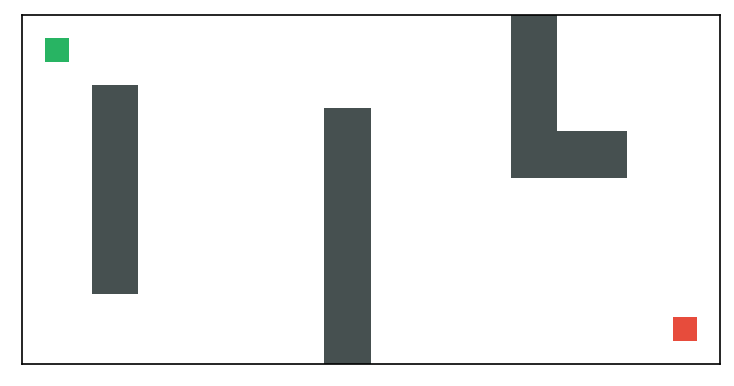

In [13]:
from src.test.simple_test import draw_test_map
draw_test_map()

Сначала запустим на ней Дийкстру. Для этого нужно передать нулевую эвристику:

Path found! Length: 39. Nodes created: 387. Number of steps: 7. Correct: True


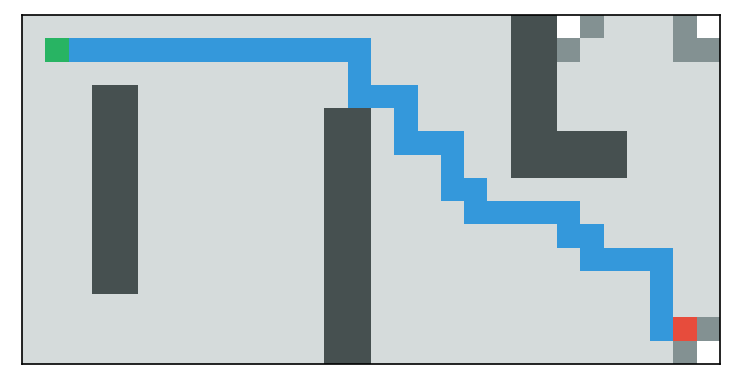

In [14]:
from src.test.simple_test import simple_test
simple_test(a_star, Open, Closed, Grid, (lambda x1, y1, x2, y2: 0))

Теперь запустим A*:

Path found! Length: 39. Nodes created: 230. Number of steps: 93. Correct: True


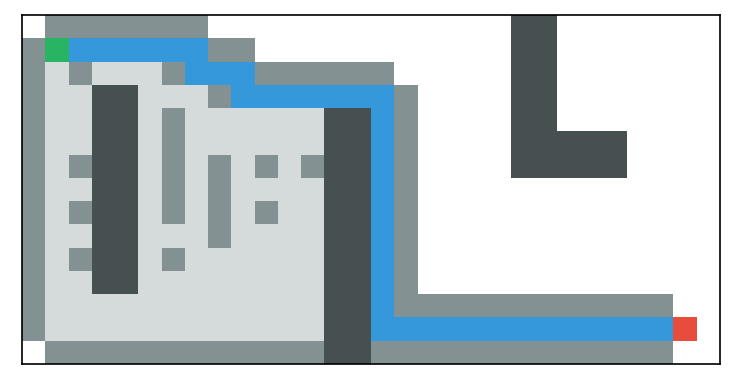

In [15]:
from src.test.simple_test import simple_test
simple_test(a_star, Open, Closed, Grid, manhattan_metric)